<a href="https://colab.research.google.com/github/prajeeta15/ANOVA/blob/main/GenderAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as sp
import scipy.special
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sp.stats.f.ppf(.95, 3, 328)

2.6321415117354894

In [3]:
df = pd.read_excel('/anova_train2.xlsx')
df.head()

,Japanese,Dutch,Danish
0,161.783130,187.726286,174.746213
1,145.329934,179.338741,174.133579
2,174.569597,176.566656,178.966745
3,160.003162,184.570245,179.335222
4,162.242898,184.056181,167.497992


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dutch_mean = df['Dutch'].mean()
japanese_mean = df['Japanese'].mean()
danish_mean = df['Danish'].mean()
grand_mean = (dutch_mean+japanese_mean+danish_mean)/3

SST = len(df['Japanese'])*(japanese_mean-grand_mean)**2\
      +len(df['Dutch'])*(dutch_mean-grand_mean)**2\
      +len(df['Danish'])*(danish_mean-grand_mean)**2
MST = SST/2

SSE = (len(df['Japanese'])-1)*df['Japanese'].var(ddof=1)\
      +(len(df['Dutch'])-1)*df['Dutch'].var(ddof=1)\
      +(len(df['Danish'])-1)*df['Danish'].var(ddof=1)
n = len(df['Japanese']) + len(df['Dutch']) + len(df['Danish'])
k = 3
MSE = SSE/(n-k)

F = MST/MSE
print('F-statistic: {}'.format(F))
print('p-value: {}'.format(1 - sp.stats.f.cdf(F, 2, n-k)))

F-statistic: 37.960575447499885
p-value: 2.3363533330211794e-12


In [6]:
print('Japanese sample variance: {}'.format(df['Japanese'].var(ddof=1)))
print('Danish sample variance: {}'.format(df['Danish'].var(ddof=1)))
print('Dutch sample variance: {}'.format(df['Dutch'].var(ddof=1)))

Japanese sample variance: 145.9336967607487
Danish sample variance: 20.10819506692926
Dutch sample variance: 15.844843124694972


Mounted at /content/drive


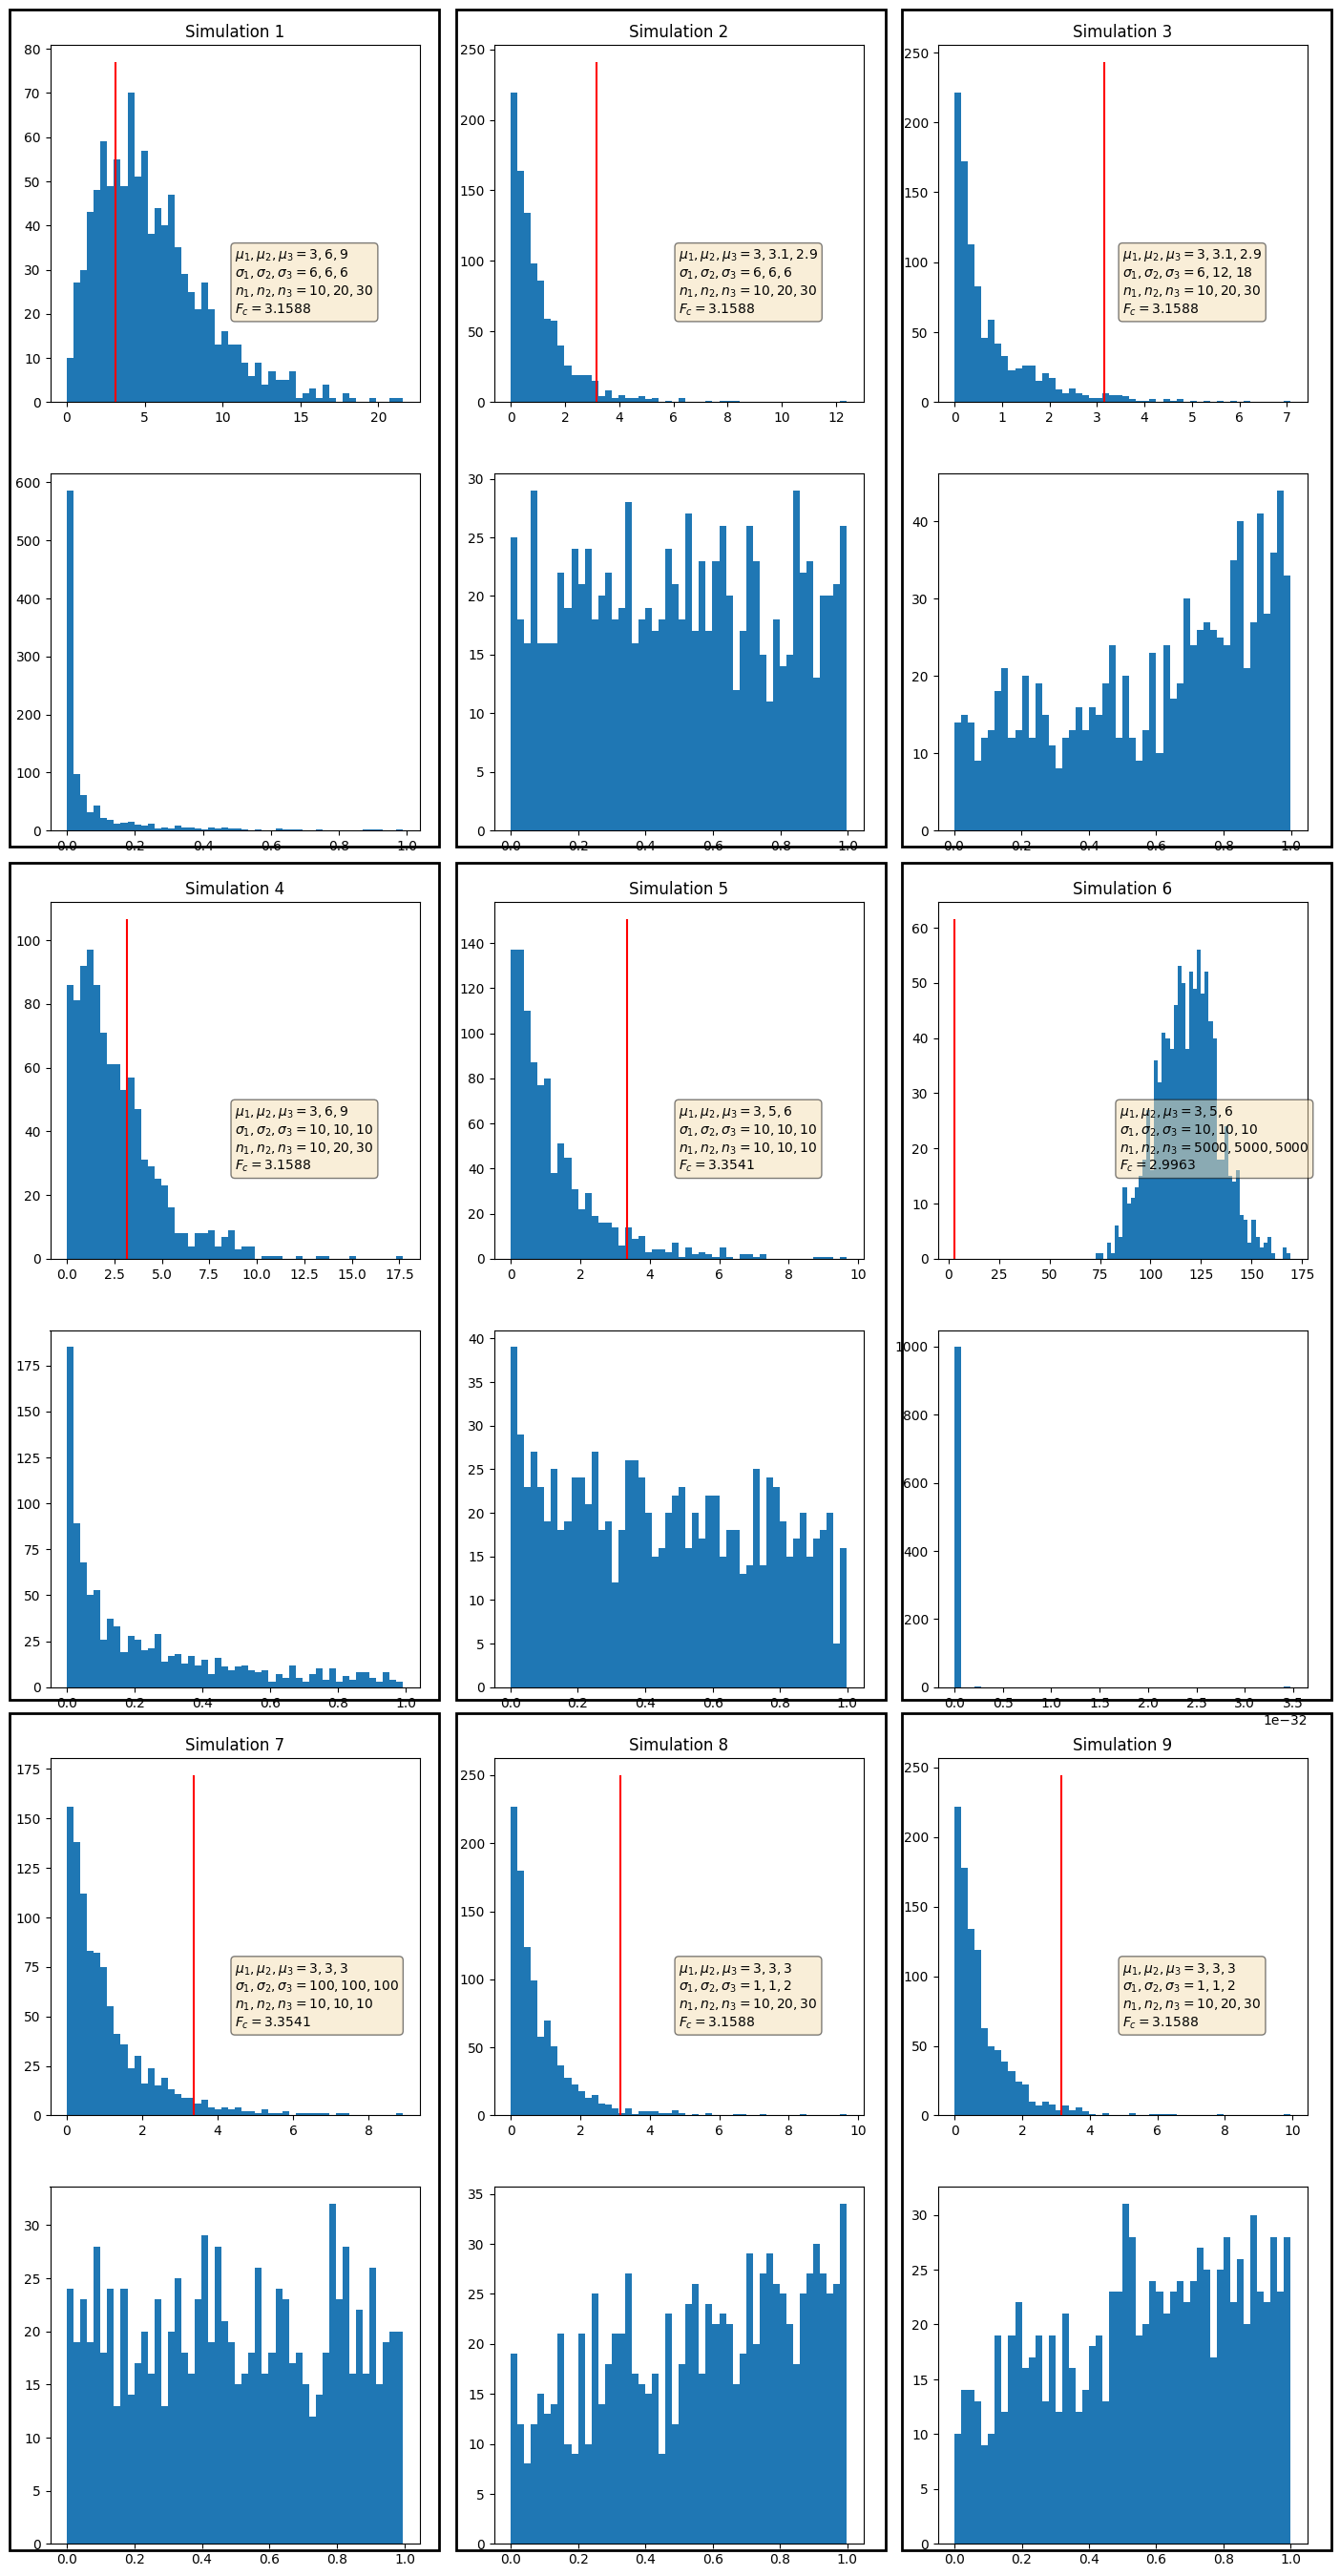

In [7]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import sys
# Append the directory to the python path using sys
sys.path.append('/content/drive/MyDrive')
# Import the module
import plot_material
plot_material.anova_plot()

In [8]:
import pandas as pd
df2 = pd.read_excel('/anova_train2.xlsx')

In [9]:
df2.head()

,Japanese,Dutch,Danish
0,161.783130,187.726286,174.746213
1,145.329934,179.338741,174.133579
2,174.569597,176.566656,178.966745
3,160.003162,184.570245,179.335222
4,162.242898,184.056181,167.497992


In [11]:
df2.columns

Index(['Japanese', 'Dutch', 'Danish'], dtype='object')

In [12]:
dutch_mean = df2['Dutch'].mean()
japanese_mean = df2['Japanese'].mean()
danish_mean = df2['Danish'].mean()
grand_mean = (dutch_mean+japanese_mean+danish_mean)/3

SSE = (len(df2['Japanese'])-1)*df2['Japanese'].var(ddof=1)\
    +(len(df2['Dutch'])-1)*df2['Dutch'].var(ddof=1)\
    +(len(df2['Danish'])-1)*df2['Danish'].var(ddof=1)

n = len(df2['Japanese']) + len(df2['Dutch']) + len(df2['Danish'])
k = 3
MSE = SSE/(n-k)

In [13]:
import scipy.stats as stats
import numpy as np

def lsd(sig_level, MSE, n1, n2):
    t = stats.t.ppf(1-sig_level/2, n1+n2-2)
    return t*np.sqrt(MSE*(1/n1+1/n2))

In [14]:
jadu = japanese_mean-dutch_mean
jada = japanese_mean-danish_mean
duda = dutch_mean-danish_mean

jadu_lsd_low = jadu - lsd(.05, MSE, len(df2['Japanese']), len(df2['Dutch']))
jadu_lsd_high = jadu + lsd(.05, MSE, len(df2['Japanese']), len(df2['Dutch']))

jada_lsd_low = jada - lsd(.05, MSE, len(df2['Japanese']), len(df2['Danish']))
jada_lsd_high = jada + lsd(.05, MSE, len(df2['Japanese']), len(df2['Danish']))

duda_lsd_low = duda - lsd(.05, MSE, len(df2['Dutch']), len(df2['Danish']))
duda_lsd_high = duda + lsd(.05, MSE, len(df2['Dutch']), len(df2['Danish']))

print('Comparison, Point Estimate, Lower Bound, Upper Bound')
print('Japanese - Dutch   : {:.4f},    {:.4f},     {:.4f}'.format(jadu, jadu_lsd_low, jadu_lsd_high))
print('Japanese - Danish  : {:.4f},    {:.4f},     {:.4f}'.format(jada, jada_lsd_low , jada_lsd_high))
print('Dutch - Danish     : {:.4f},       {:.4f},       {:.4f}'.format(duda, duda_lsd_low , duda_lsd_high))

Comparison, Point Estimate, Lower Bound, Upper Bound
Japanese - Dutch   : -17.7116,    -21.8838,     -13.5394
Japanese - Danish  : -12.2196,    -16.3918,     -8.0474
Dutch - Danish     : 5.4920,       1.3198,       9.6642


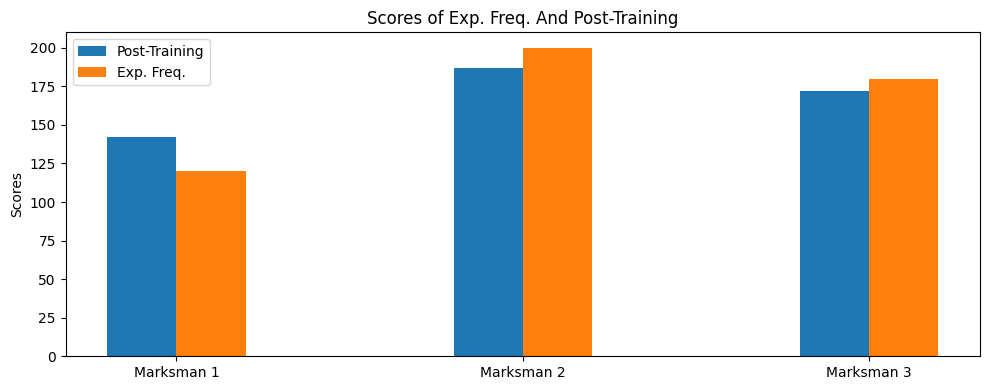

In [15]:
labels = ['Marksman 1', 'Marksman 2', 'Marksman 3']
post_training = np.array([142, 187, 172])
exp_frequency = np.array([120, 200, 180])

x = np.arange(len(labels))  # the label locations
width = .2  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 4))
rects1 = ax.bar(x - width/2, post_training, width, label='Post-Training')
rects2 = ax.bar(x + width/2, exp_frequency, width, label='Exp. Freq.')

ax.set_ylabel('Scores')
ax.set_title('Scores of Exp. Freq. And Post-Training')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [16]:
sum((post_training - exp_frequency)**2/exp_frequency)

5.233888888888888

In [17]:
stats.chi2.ppf(.90, 4)

7.779440339734858